In [361]:
#!pip install tensorflow

In [362]:
import tensorflow as tf
from tensorflow import keras

In [363]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [364]:
X_train.shape

(60000, 28, 28)

In [365]:
X_test.shape

(10000, 28, 28)

In [366]:
X_train = X_train / 255
X_test = X_test / 255

In [367]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [368]:
y_train[0]

5

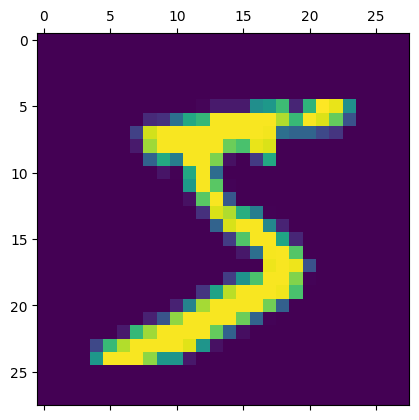

In [369]:
from matplotlib import pyplot as plt
plt.matshow(X_train[0])

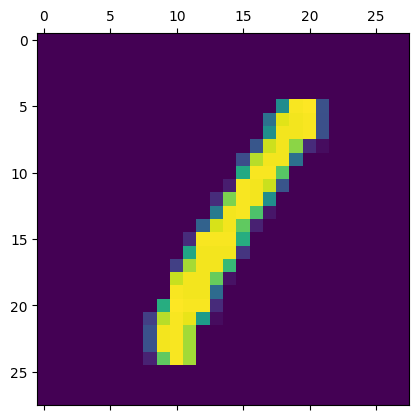

In [370]:
plt.matshow(X_train[3])

In [371]:
y_train[3]

1

In [372]:
#X_train_flattened= X_train.reshape(len(X_train), 28*28)
#X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [373]:
#X_train_flattened.shape

In [374]:
#X_test_flattened.shape

In [375]:
#X_test_flattened[0] # Converted to 1d

In [376]:
#X_train_flattened[0]

In [377]:
#Instead of manually flattening, I'll flatten in model

In [378]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28])) # Input Layer
#model.add(Dense(100, activation="relu")) # Hidden Layer
model.add(Dense(10, activation="sigmoid")) #Output Layer. 10 because 0 to 9 ouput

C:\Users\ANITHA SRI\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [380]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [381]:
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [382]:
model.fit(X_train, y_train, epochs= 5) # epochs is the number of iterations to train

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8077 - loss: 0.7277
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9137 - loss: 0.3105
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9195 - loss: 0.2801
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9253 - loss: 0.2684
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9253 - loss: 0.2675


In [383]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9105 - loss: 0.3072


[0.27053332328796387, 0.9240999817848206]

In [384]:
model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step


array([[2.20392849e-02, 3.44368061e-07, 4.06026244e-02, ...,
        9.99719322e-01, 5.64640053e-02, 5.55566311e-01],
       [4.52066809e-01, 6.34797709e-03, 9.99073148e-01, ...,
        1.08826511e-12, 1.27040595e-01, 1.70915737e-09],
       [5.38198161e-04, 9.93724167e-01, 6.50601029e-01, ...,
        1.80235073e-01, 3.93120527e-01, 4.30950671e-02],
       ...,
       [5.05325670e-06, 4.25543749e-06, 8.10974860e-04, ...,
        2.29790449e-01, 4.49628472e-01, 6.77850664e-01],
       [1.87667116e-04, 1.31249632e-04, 1.23509599e-04, ...,
        4.49621621e-05, 6.50219440e-01, 8.87951246e-05],
       [1.34832663e-02, 3.98828193e-10, 1.00836240e-01, ...,
        1.39030725e-08, 1.39491414e-04, 1.11069073e-06]], dtype=float32)

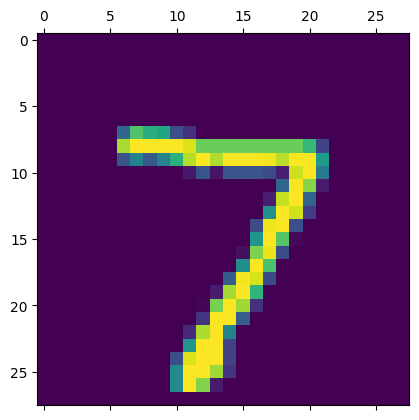

In [385]:
plt.matshow(X_test[0])

In [386]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step


array([2.20392849e-02, 3.44368061e-07, 4.06026244e-02, 9.58900809e-01,
       1.66984531e-03, 1.01526946e-01, 1.09560779e-06, 9.99719322e-01,
       5.64640053e-02, 5.55566311e-01], dtype=float32)

In [387]:
import numpy as np
np.argmax(y_predicted[0])

7

In [388]:
y_predicted_labels = [np.argmax(i) for i in y_predicted] 
#converts each prediction from probability vector → to actual class label (0 to 9)
# model.predict() gives probabilities because of the activation function used in the final layer of your model.
# The softmax/Sigmoid activation function: Turns raw output (logits) into probabilities
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [389]:
cm = tf.math.confusion_matrix(y_test, y_predicted_labels)

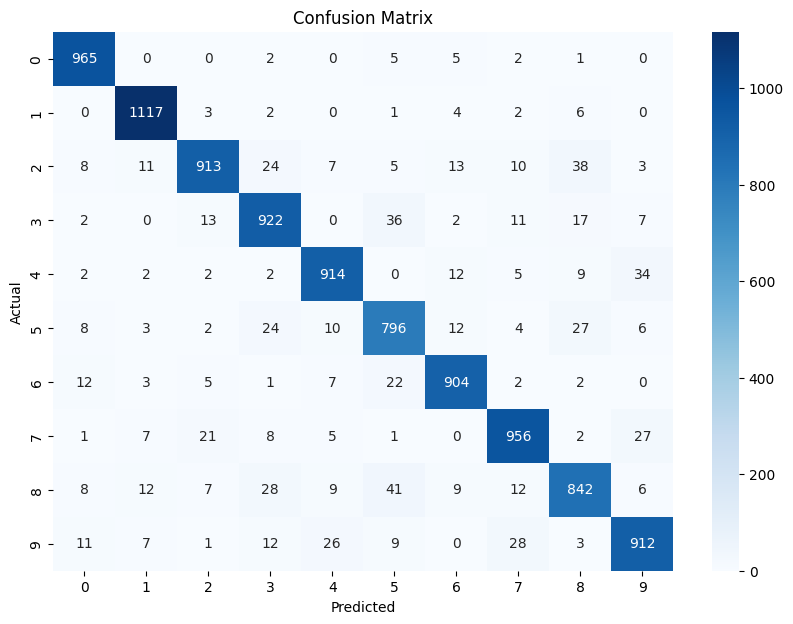

In [390]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot= True, fmt= 'd', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [422]:
# Model With Hidden Layers

modelhd = Sequential()
modelhd.add(Flatten(input_shape=[28, 28])) # Input Layer
modelhd.add(Dense(100, activation="relu")) # Hidden Layer
modelhd.add(Dense(10, activation="sigmoid")) #Output Layer. 10 because 0 to 9 ouput

C:\Users\ANITHA SRI\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [426]:
modelhd.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy', metrics= ['accuracy'])

In [431]:
modelhd.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8672 - loss: 0.4651
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9616 - loss: 0.1323
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9737 - loss: 0.0874
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9810 - loss: 0.0645
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9866 - loss: 0.0449


In [433]:
modelhd.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9729 - loss: 0.0853


[0.07356172800064087, 0.9771999716758728]